In [246]:
import pandas as pd
import numpy as np 
import sidetable 
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None 
df = pd.read_csv('./datos/data_analyst.csv', index_col = 0)
df.head()

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
16,16,Belgium,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,We are exploring ML methods (and may one day p...,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,"Kaggle Notebooks,Colab Notebooks, Databricks ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,Kaggle Learn Courses,Cloud-certificat...","Kaggle (notebooks, forums, etc),Blogs (Towards..."
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,"Google Cloud Datalab,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,Egypt,Data Analyst,3-5 years,R,A laptop,Never,I do not use machine learning methods,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...",Python,"Notepad++,Jupyter Notebook",Other,None,NaN,NaN,Analyze and understand data to influence produ...,NaN,"Kaggle Notebooks,Colab Notebooks,",NaN,NaN,"None,",NaN,NaN,"No / None,","No / None,",NaN,"No / None,","I do not share my work publicly,","Coursera,Kaggle Learn Courses,DataCamp,Univers...","Twitter (data science influencers),Email newsl..."
46,46,China,Data Analyst,< 1 years,Python,A personal computer / desktop,2-5 times,1-2 years,No (we do not use ML methods),NaN,"Basic statistical software (Microsoft Excel, G...","Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",NVIDIA GPUs,"Matplotlib ,Plotly / Plotly Express","Scikit-learn , TensorFlow ,Keras ,PyTorch","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"Kaggle Notebooks,Azure Notebooks,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,edX,Kaggle Learn Courses,","Twitter (data science influencers),Kaggle (not..."
52,52,South Africa,Data Analyst,1-3 years,R,A laptop,Never,1-2 years,No (we do not use ML methods),NaN,"Local development environments (RStudio, Jupyt...","R, SQL","RStudio ,Jupyter Notebook",None,"Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny","Caret ,Tidymodels","Linear or Logistic Regression, Decision Trees ...",Analyze and understand data to influence produ...,NaN,"IBM Watson Studio ,",NaN,NaN,"IBM Cloud / Red Hat ,",NaN,NaN,"No / None,","No / None,",NaN,"No / None,","I do not share my work publicly,","Coursera,Udemy,","Course Forums (forums.fast.ai, Coursera forums..."


In [247]:
df['q6'].unique()

array(['20+ years', '< 1 years', '3-5 years', '1-3 years', '10-20 years',
       '5-10 years', 'I have never written code'], dtype=object)

In [248]:
df_q10=df['q10'].reset_index()
df_q10

,index,q10
0,16,"Kaggle Notebooks,Colab Notebooks, Databricks ..."
1,32,"Google Cloud Datalab,"
2,33,"Kaggle Notebooks,Colab Notebooks,"
3,46,"Kaggle Notebooks,Azure Notebooks,"
4,52,"IBM Watson Studio ,"
...,...,...
2296,25954,"Binder / JupyterHub ,"
2297,25959,"Kaggle Notebooks,Colab Notebooks,Google Cloud..."
2298,25965,"Kaggle Notebooks,Colab Notebooks,"
2299,25966,"Google Cloud Datalab,"


In [249]:

def quitar_comillas (col):
        try:
            return col.split(',')
        except:
            np.nan

In [250]:
df_q10['q10'] = df_q10['q10'].apply(quitar_comillas)

In [251]:
df_10_explode = df_q10['q10'].explode().reset_index()

In [252]:
df_10_explode

,index,q10
0,0,Kaggle Notebooks
1,0,Colab Notebooks
2,0,Databricks Collaborative Notebooks
3,0,
4,1,Google Cloud Datalab
...,...,...
5399,2300,Colab Notebooks
5400,2300,Amazon Sagemaker Studio Notebooks
5401,2300,Amazon EMR Notebooks
5402,2300,Databricks Collaborative Notebooks


In [253]:
df_10_explode['q10'].unique()

array([' Kaggle Notebooks', 'Colab Notebooks',
       ' Databricks Collaborative Notebooks ', '', 'Google Cloud Datalab',
       'Azure Notebooks', ' IBM Watson Studio ', 'Other', 'None',
       ' Observable Notebooks ', ' Binder / JupyterHub ',
       ' Amazon EMR Notebooks ',
       'Google Cloud Notebooks (AI Platform / Vertex AI) ', None,
       ' Amazon Sagemaker Studio Notebooks ', ' Deepnote Notebooks ',
       ' Paperspace / Gradient ', ' Zeppelin / Zepl Notebooks ',
       ' Code Ocean '], dtype=object)

In [254]:
gb = df_10_explode.groupby('q10').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [255]:
df_q10 = gb.reset_index(name='count')

In [256]:
df_q10.drop(0, axis= 0,inplace=True)

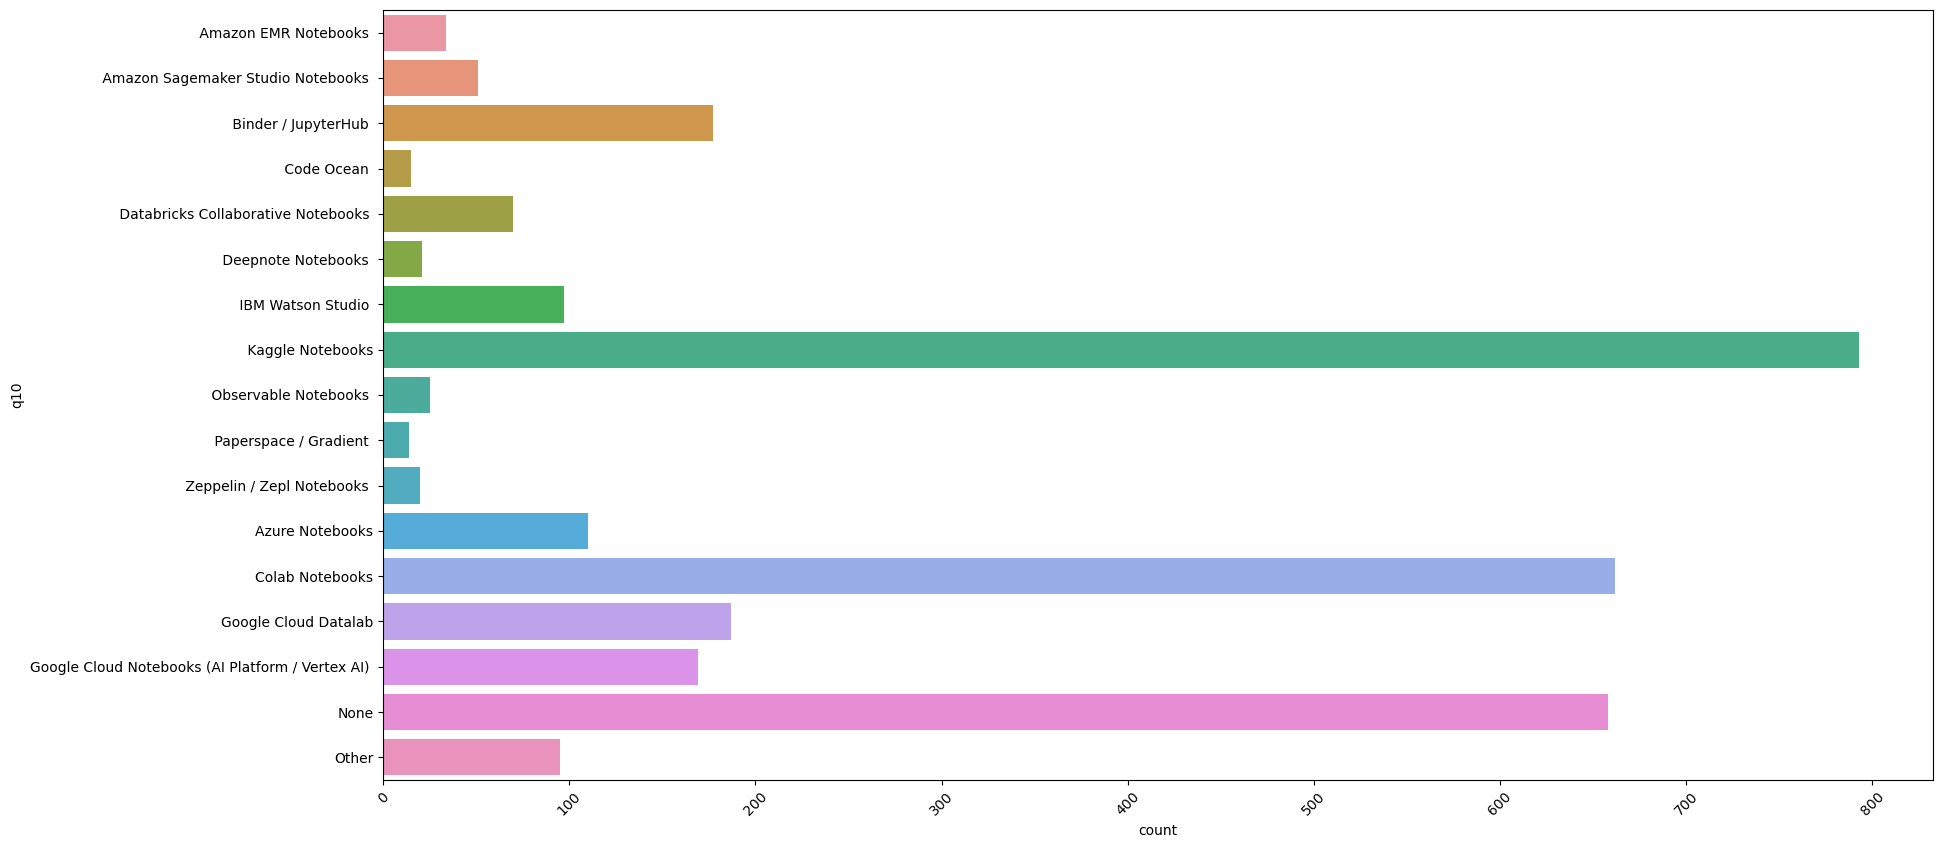

In [257]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q10', data=df_q10)
plt.xticks(rotation = 45);

In [258]:
df_q18 = df['q18'].reset_index()
df_q18

,index,q18
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,"Image segmentation methods (U-Net, Mask R-CNN,..."
2297,25959,NaN
2298,25965,"General purpose image/video tools (PIL, cv2, s..."
2299,25966,"General purpose image/video tools (PIL, cv2, s..."


In [259]:
df_q18['q18'] = df_q18['q18'].apply(quitar_comillas)

In [260]:
df_18_explode = df_q18['q18'].explode().reset_index()

In [261]:
df_18_explode

,index,q18
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
4905,2300,ResNeXt
4906,2300,NASNet
4907,2300,EfficientNet
4908,2300,etc)


In [262]:
df_18_explode['q18'].unique()

array([None,
       'Image classification and other general purpose networks (VGG',
       ' Inception', ' ResNet', ' ResNeXt', ' NASNet', ' EfficientNet',
       ' etc)', '', 'General purpose image/video tools (PIL', ' cv2',
       ' skimage', 'Image segmentation methods (U-Net', ' Mask R-CNN',
       'Object detection methods (YOLOv3', ' RetinaNet',
       'Generative Networks (GAN', ' VAE', 'Other', 'None'], dtype=object)

In [263]:
gb_18 = df_18_explode.groupby('q18').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [264]:
df_q18 = gb_18.reset_index(name ='count')

In [265]:
df_q18.drop(0, axis = 0,inplace = True)

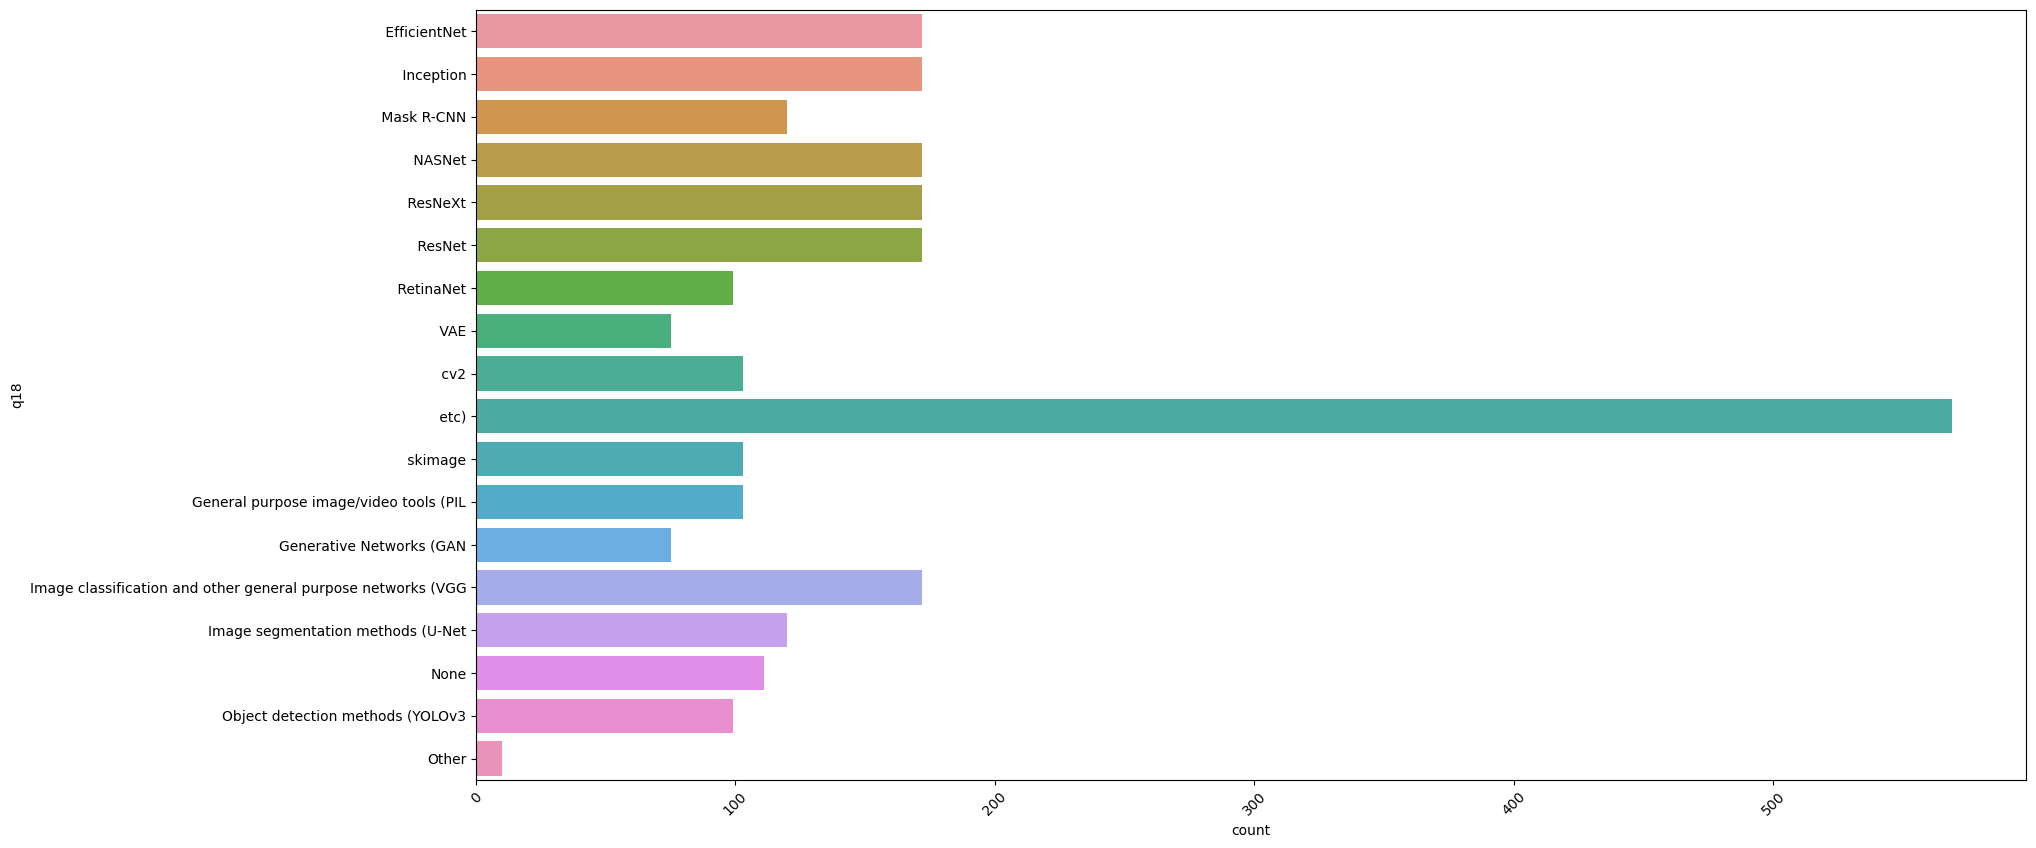

In [266]:
plt.figure(figsize = (20,10))
sns.barplot(x ='count', y = 'q18', data = df_q18)
plt.xticks(rotation = 45);

In [267]:
#q19

df_q19 = df['q19'].reset_index()
df_q19

,index,q19
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,"Word embeddings/vectors (GLoVe, fastText, word..."
2299,25966,NaN


In [268]:
df_q19['q19'] = df_q19['q19'].apply(quitar_comillas)

In [269]:
df_19_explode = df_q19['q19'].explode().reset_index()

In [270]:
df_19_explode

,index,q19
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
3481,2298,XLnet
3482,2298,etc)
3483,2298,
3484,2299,None


In [271]:
df_19_explode['q19'].unique()

array([None, 'Word embeddings/vectors (GLoVe', ' fastText', ' word2vec)',
       'Transformer language models (GPT-3', ' BERT', ' XLnet', ' etc)',
       '', 'None', 'Encoder-decorder models (seq2seq',
       ' vanilla transformers)', 'Contextualized embeddings (ELMo',
       ' CoVe)', 'Other'], dtype=object)

In [272]:
gb_19 = df_19_explode.groupby('q19').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [273]:
df_q19 = gb_19.reset_index(name = 'count')

In [274]:
df_q19.drop(0, axis = 0,inplace = True)

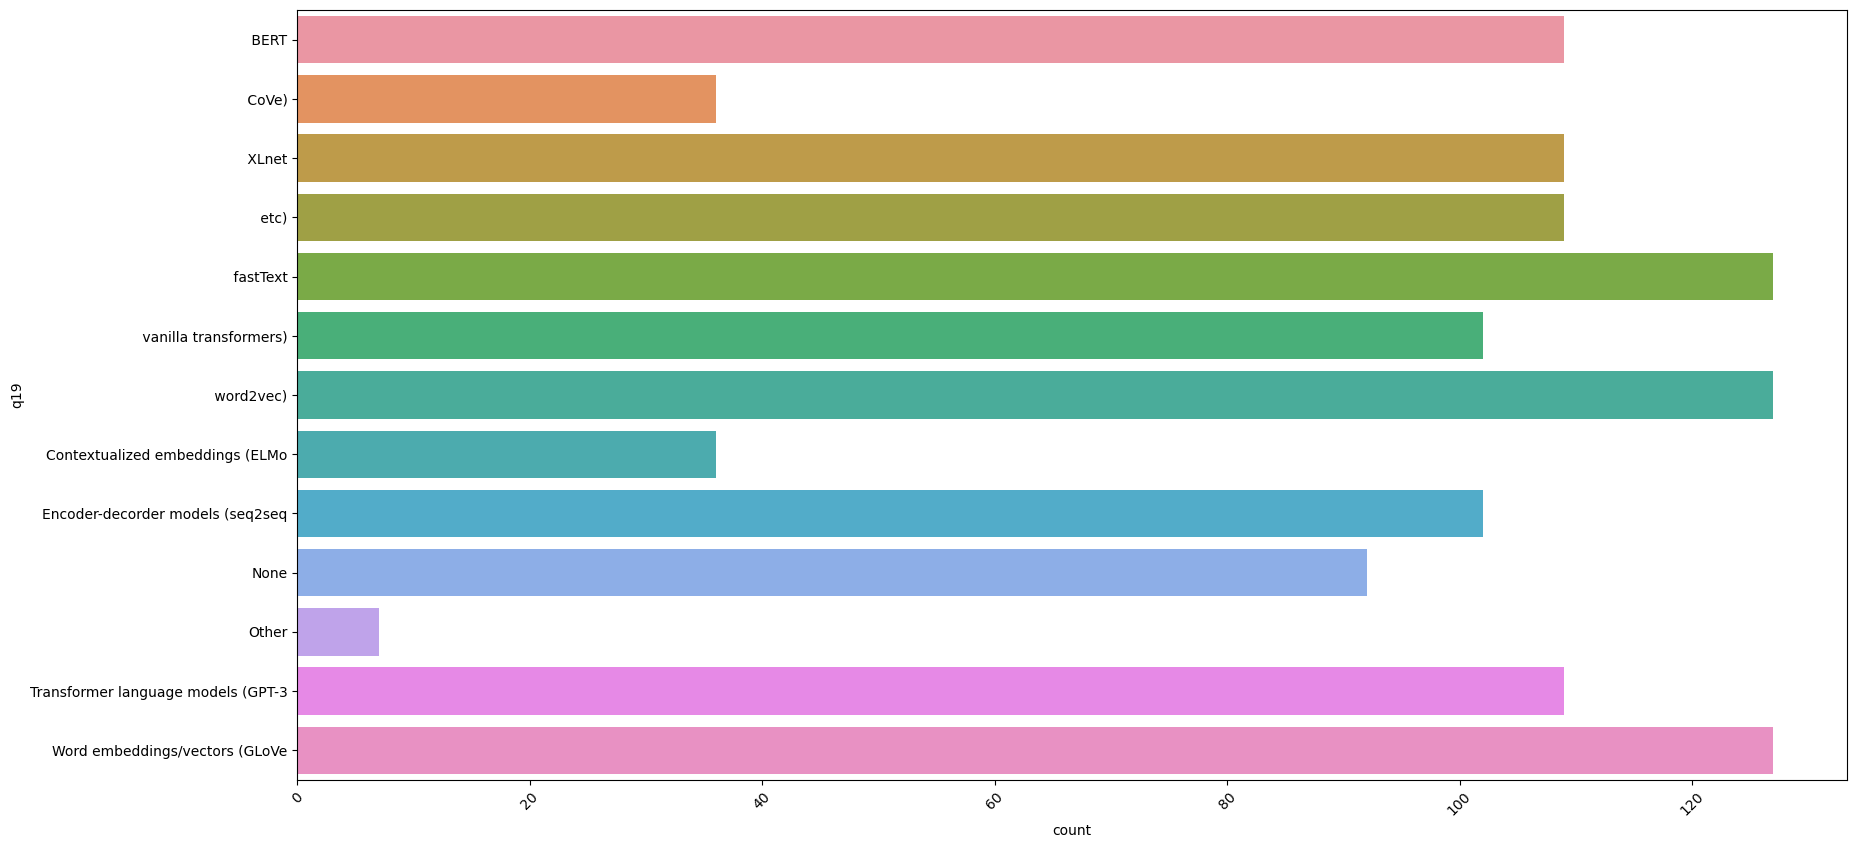

In [275]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q19', data = df_q19)
plt.xticks(rotation = 45);

In [276]:
#q27

df_q27 = df['q27'].reset_index()
df_q27

,index,q27
0,16,NaN
1,32,NaN
2,33,"None,"
3,46,NaN
4,52,"IBM Cloud / Red Hat ,"
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [277]:
df_q27['q27'] = df_q27['q27'].apply(quitar_comillas)

In [278]:
df_27_explode = df_q27['q27'].explode().reset_index()

In [279]:
df_27_explode

,index,q27
0,0,None
1,1,None
2,2,None
3,2,
4,3,None
...,...,...
4138,2298,None
4139,2299,None
4140,2300,Amazon Web Services (AWS)
4141,2300,Microsoft Azure


In [280]:
df_27_explode['q27'].unique()

array([None, 'None', '', ' IBM Cloud / Red Hat ', ' Microsoft Azure ',
       ' Amazon Web Services (AWS) ', ' Google Cloud Platform (GCP) ',
       ' SAP Cloud ', ' Salesforce Cloud ', ' Alibaba Cloud ',
       ' Tencent Cloud ', ' VMware Cloud ', ' Oracle Cloud ', 'Other'],
      dtype=object)

In [281]:
gb_27 = df_27_explode.groupby('q27').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [282]:
df_q27 = gb_27.reset_index(name = 'count')

In [283]:
df_q27.drop(0, axis = 0,inplace = True)

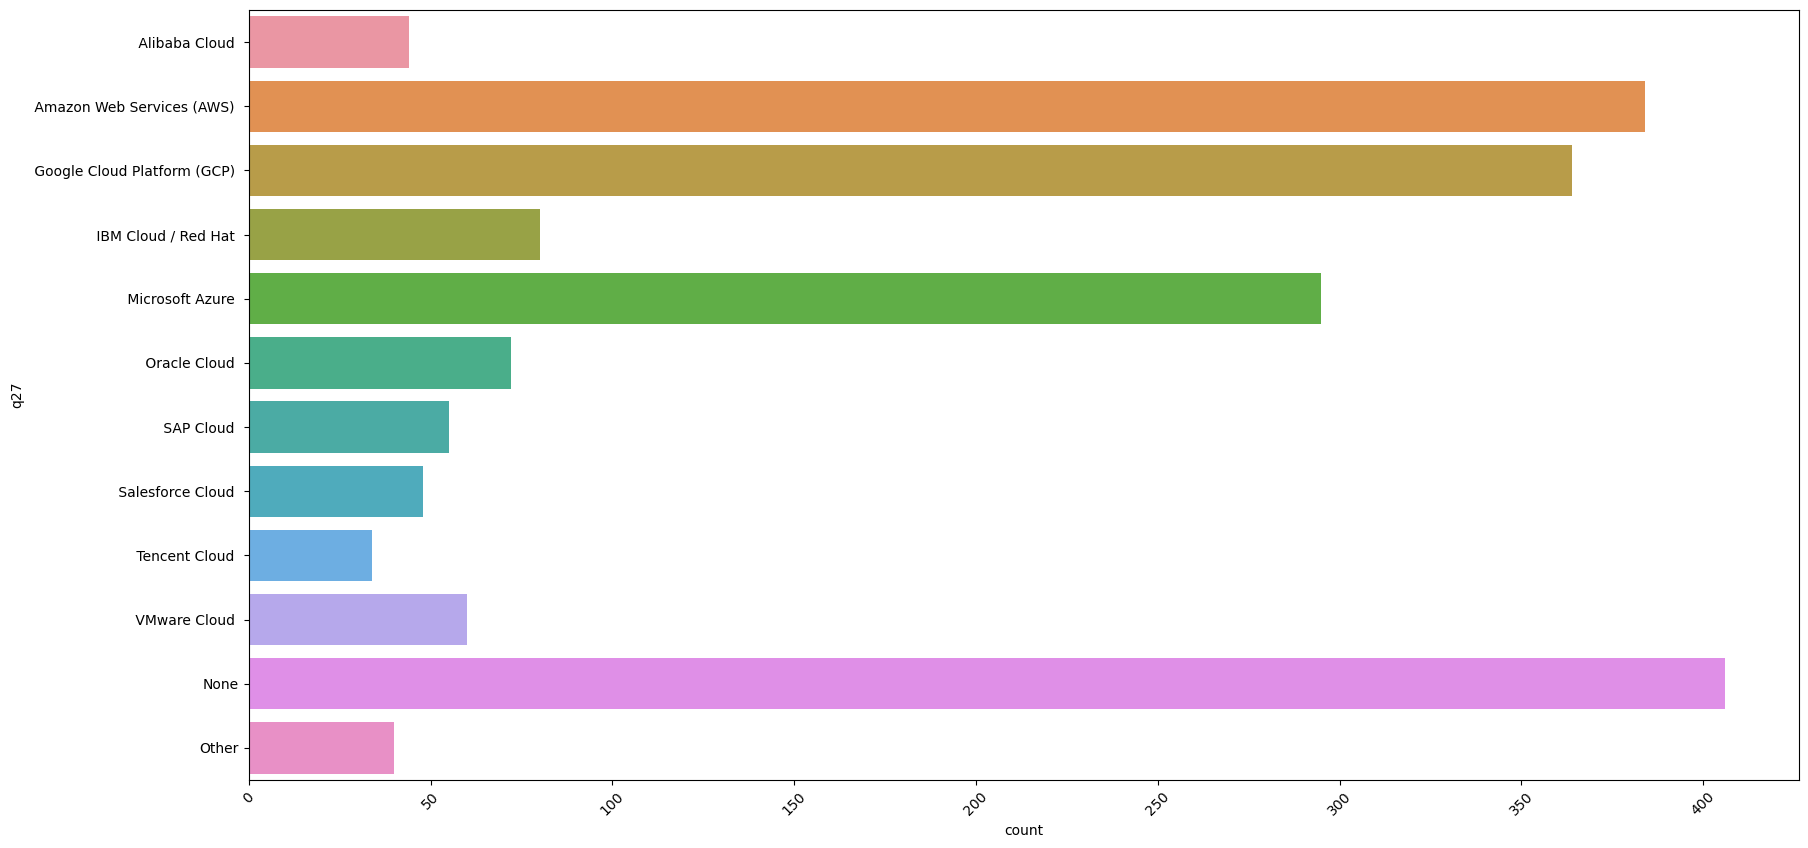

In [284]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q27', data = df_q27)
plt.xticks(rotation = 45);

# Q29

In [285]:
df_q29=df['q29'].reset_index()
df_q29

,index,q29
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [286]:
df_q29['q29'] = df_q29['q29'].apply(quitar_comillas)
df_q29

,index,q29
0,16,None
1,32,None
2,33,None
3,46,None
4,52,None
...,...,...
2296,25954,None
2297,25959,None
2298,25965,None
2299,25966,None


In [287]:
df_29_explode = df_q29['q29'].explode().reset_index()
df_29_explode


,index,q29
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
3139,2298,None
3140,2299,None
3141,2300,Amazon Elastic Compute Cloud (EC2)
3142,2300,Microsoft Azure Virtual Machines


In [288]:
df_29_gp = df_29_explode.groupby('q29').size()
df_29_gp

q29
                                        720
 Amazon Elastic Compute Cloud (EC2)     192
 Google Cloud Compute Engine            193
 Microsoft Azure Virtual Machines       168
No / None                               290
Other                                    18
dtype: int64

In [289]:
df_29_gp = df_29_gp.reset_index(name='count')
df_29_gp

,q29,count
0,,720
1,Amazon Elastic Compute Cloud (EC2),192
2,Google Cloud Compute Engine,193
3,Microsoft Azure Virtual Machines,168
4,No / None,290
5,Other,18


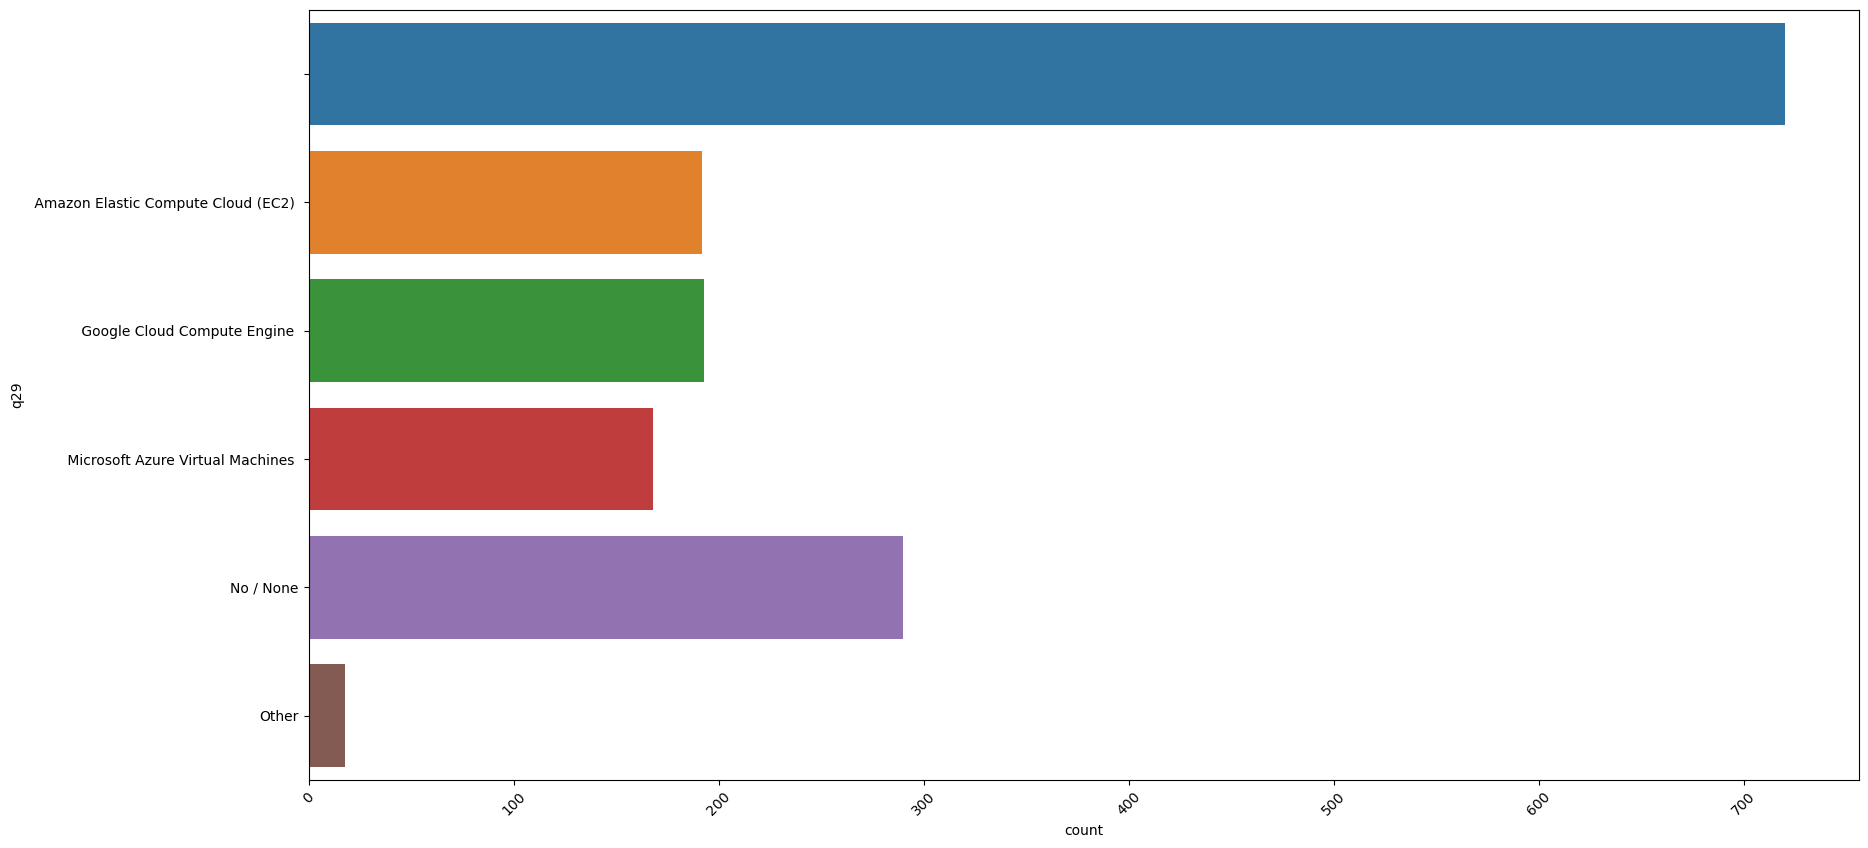

In [290]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q29', data=df_29_gp)
plt.xticks(rotation = 45);

# Q30

In [291]:
df_q30=df['q30'].reset_index()
df_q30

,index,q30
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [292]:
df_q30['q30'] = df_q30['q30'].apply(quitar_comillas)
df_q30

,index,q30
0,16,None
1,32,None
2,33,None
3,46,None
4,52,None
...,...,...
2296,25954,None
2297,25959,None
2298,25965,None
2299,25966,None


In [293]:
df_30_explode = df_q30['q30'].explode().reset_index()
df_30_explode

,index,q30
0,0,None
1,1,None
2,2,None
3,3,None
4,4,None
...,...,...
3298,2298,None
3299,2299,None
3300,2300,Amazon Simple Storage Service (S3)
3301,2300,Amazon Elastic File System (EFS)


In [294]:
df_30_gp = df_30_explode.groupby('q30').size()
df_30_gp

q30
                                         720
 Amazon Elastic File System (EFS)         64
 Amazon Simple Storage Service (S3)      185
 Google Cloud Filestore                   97
Google Cloud Storage (GCS)               220
Microsoft Azure Data Lake Storage        108
Microsoft Azure Disk Storage             101
No / None                                227
Other                                     14
dtype: int64

In [295]:
df_30_gp= df_30_gp.reset_index(name='count')
df_30_gp

,q30,count
0,,720
1,Amazon Elastic File System (EFS),64
2,Amazon Simple Storage Service (S3),185
3,Google Cloud Filestore,97
4,Google Cloud Storage (GCS),220
5,Microsoft Azure Data Lake Storage,108
6,Microsoft Azure Disk Storage,101
7,No / None,227
8,Other,14


In [296]:
df_30_gp.drop(0, axis= 0,inplace=True)

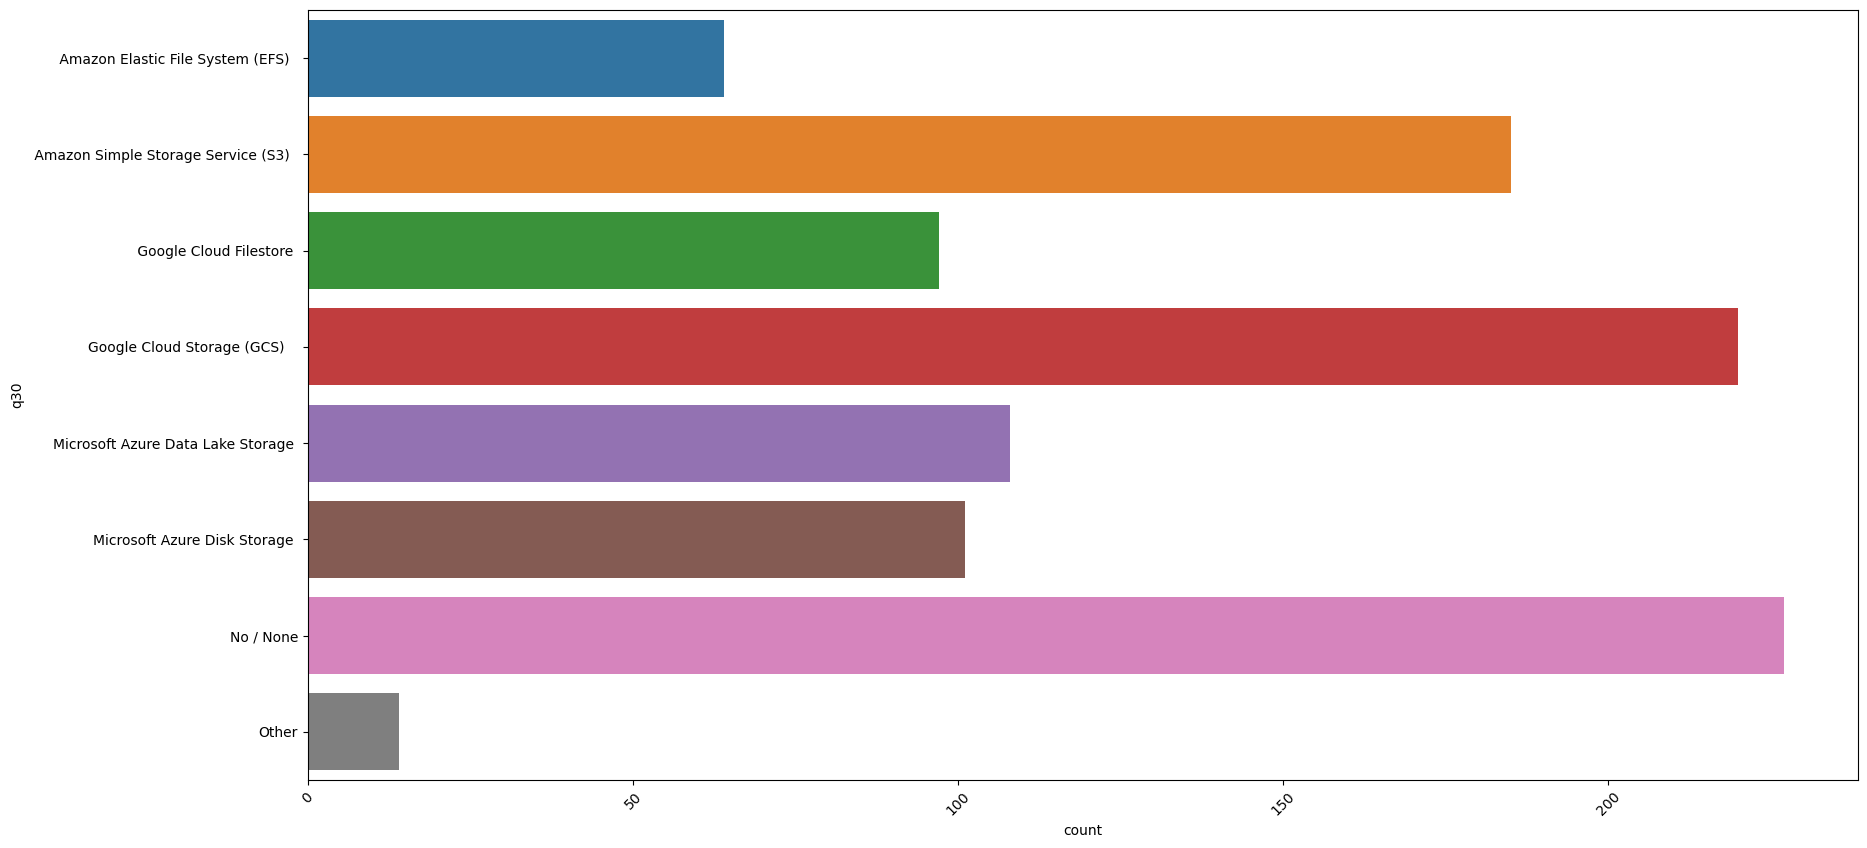

In [297]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q30', data=df_30_gp)
plt.xticks(rotation = 45);

# Q31

In [298]:
df_q31=df['q31'].reset_index()
df_q31

,index,q31
0,16,NaN
1,32,NaN
2,33,"No / None,"
3,46,NaN
4,52,"No / None,"
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [299]:
df_q31['q31'] = df_q31['q31'].apply(quitar_comillas)
df_q31

,index,q31
0,16,None
1,32,None
2,33,"[No / None, ]"
3,46,None
4,52,"[No / None, ]"
...,...,...
2296,25954,None
2297,25959,None
2298,25965,None
2299,25966,None


In [300]:
df_31_explode = df_q31['q31'].explode().reset_index()
df_31_explode

,index,q31
0,0,None
1,1,None
2,2,No / None
3,2,
4,3,None
...,...,...
3715,2298,None
3716,2299,None
3717,2300,Amazon SageMaker
3718,2300,Databricks


In [301]:
df_31_gp = df_31_explode.groupby('q31').size()
df_31_gp

q31
                                   1225
 Alteryx                             55
 Amazon SageMaker                    79
 Azure Machine Learning Studio      126
 DataRobot                           52
 Databricks                         104
 Dataiku                             33
 Google Cloud Vertex AI              87
 Rapidminer                          48
No / None                           835
Other                                36
dtype: int64

In [302]:
df_31_gp= df_31_gp.reset_index(name='count')
df_31_gp.drop(0, axis= 0,inplace=True)
df_31_gp

,q31,count
1,Alteryx,55
2,Amazon SageMaker,79
3,Azure Machine Learning Studio,126
4,DataRobot,52
5,Databricks,104
6,Dataiku,33
7,Google Cloud Vertex AI,87
8,Rapidminer,48
9,No / None,835
10,Other,36


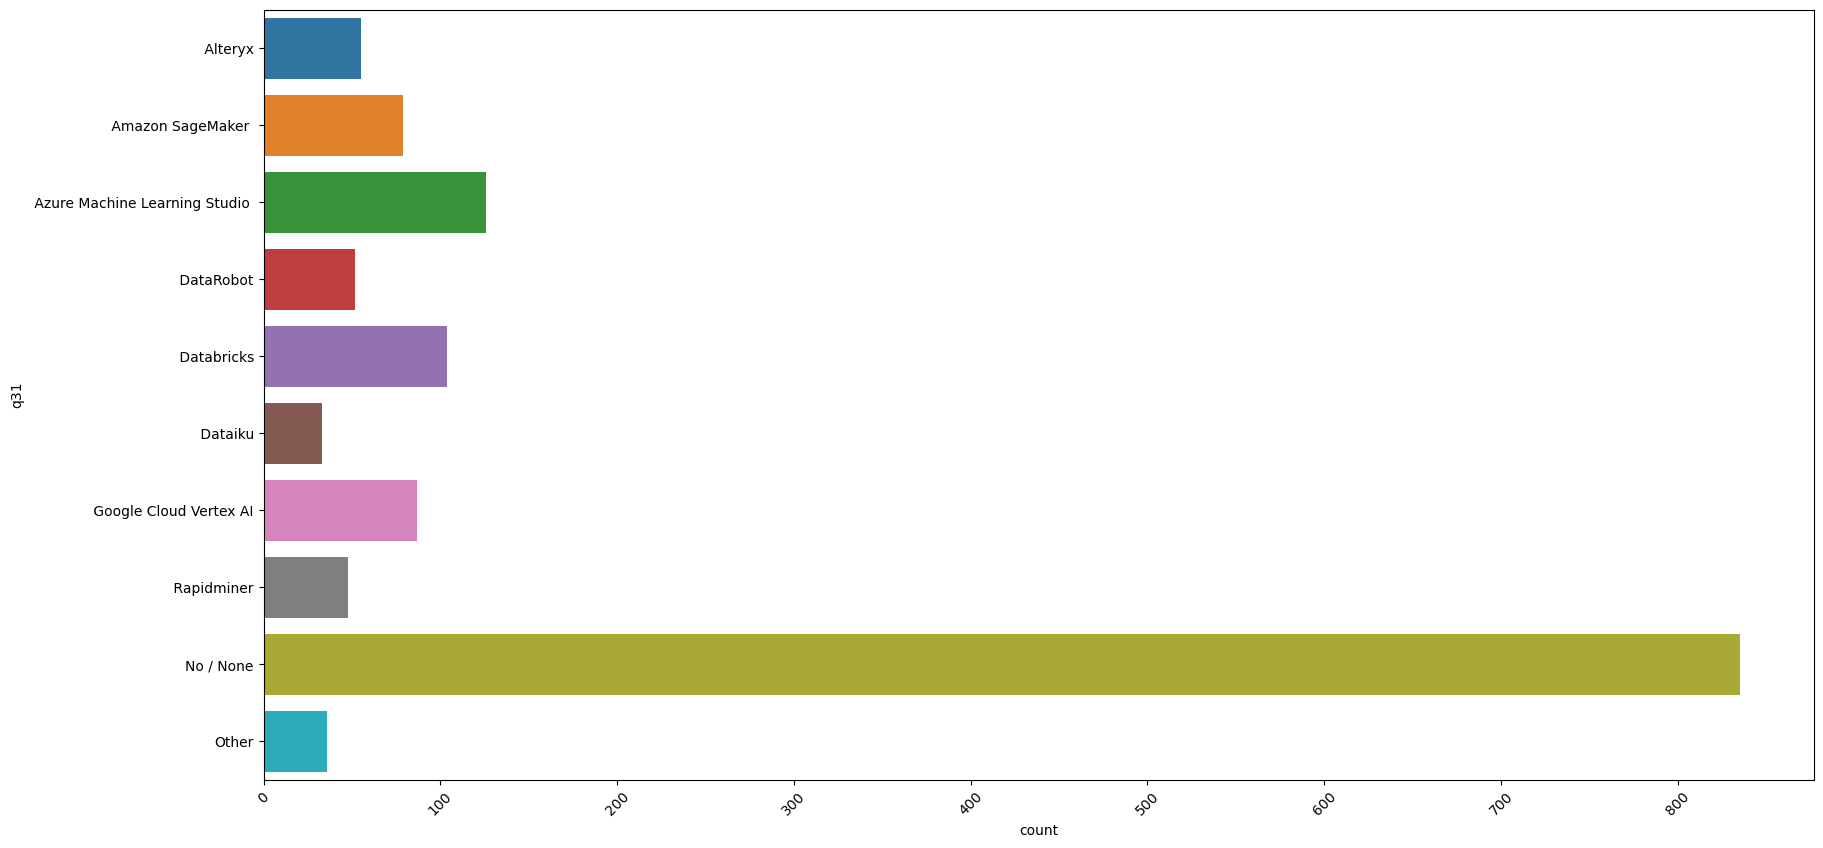

In [303]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q31', data=df_31_gp)
plt.xticks(rotation = 45);

# q33
    Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?
    Question 33 (which specific product) was only asked to respondents that selected more than one choice
for Question 32-A (which of the following products)

In [304]:
df_q33=df['q33'].reset_index()
df_q33

,index,q33
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [305]:
df_q33['q33'] = df_q33['q33'].apply(quitar_comillas)

In [306]:
df_q33_explode = df_q33['q33'].explode().reset_index()

In [307]:
gb_q33 = df_q33_explode.groupby('q33').size()

In [308]:
df_q33 = gb_q33.reset_index(name='count')

In [309]:
df_q33.head()

,q33,count
0,Amazon Aurora,2
1,Amazon DynamoDB,5
2,Amazon RDS,4
3,Amazon Redshift,18
4,Google Cloud BigQuery,49


In [310]:
df_q33.drop(0, axis= 0,inplace=True)

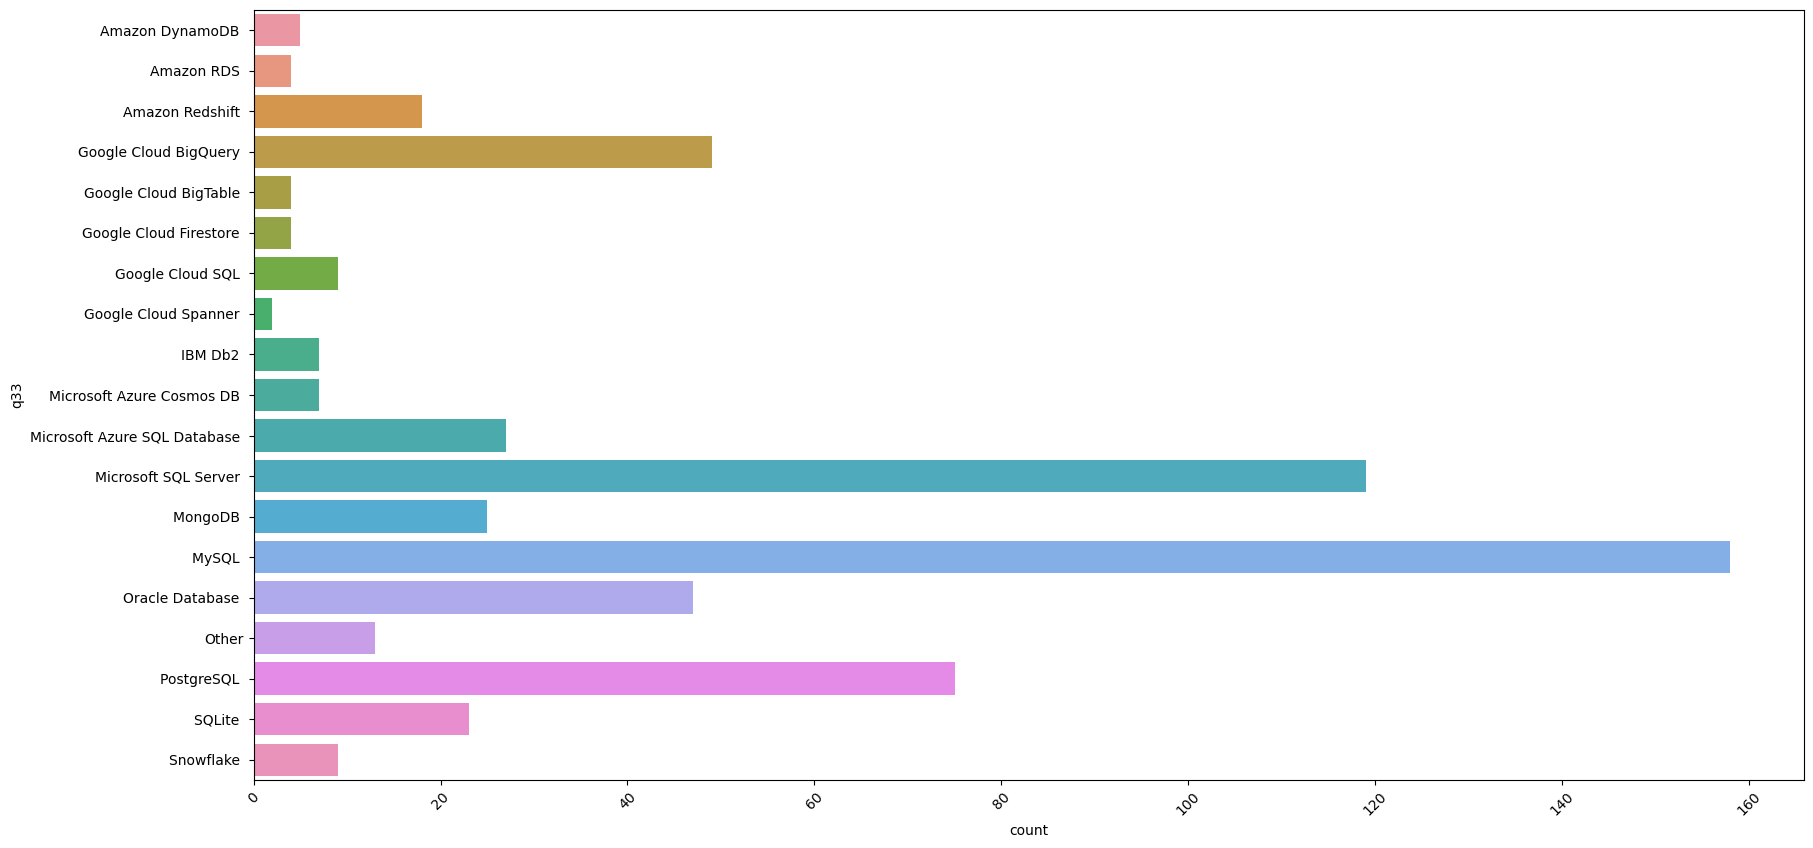

In [311]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q33', data=df_q33)
plt.xticks(rotation = 45);

# q36
- Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

In [312]:
df_q36=df['q36'].reset_index()
df_q36

,index,q36
0,16,NaN
1,32,NaN
2,33,"No / None,"
3,46,NaN
4,52,"No / None,"
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [313]:
df_q36['q36'] = df_q36['q36'].apply(quitar_comillas)

In [314]:
df_q36_explode = df_q36['q36'].explode().reset_index()

In [315]:
gb_q36 = df_q36_explode.groupby('q36').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [316]:
df_q36 = gb_q36.reset_index(name='count')

In [317]:
df_q36.head()

,q36,count
0,,1187
1,H2O Driverless AI),84
2,Vizier),58
3,albumentations),103
4,boruta_py),78


In [318]:
df_q36.drop(0, axis= 0,inplace=True)

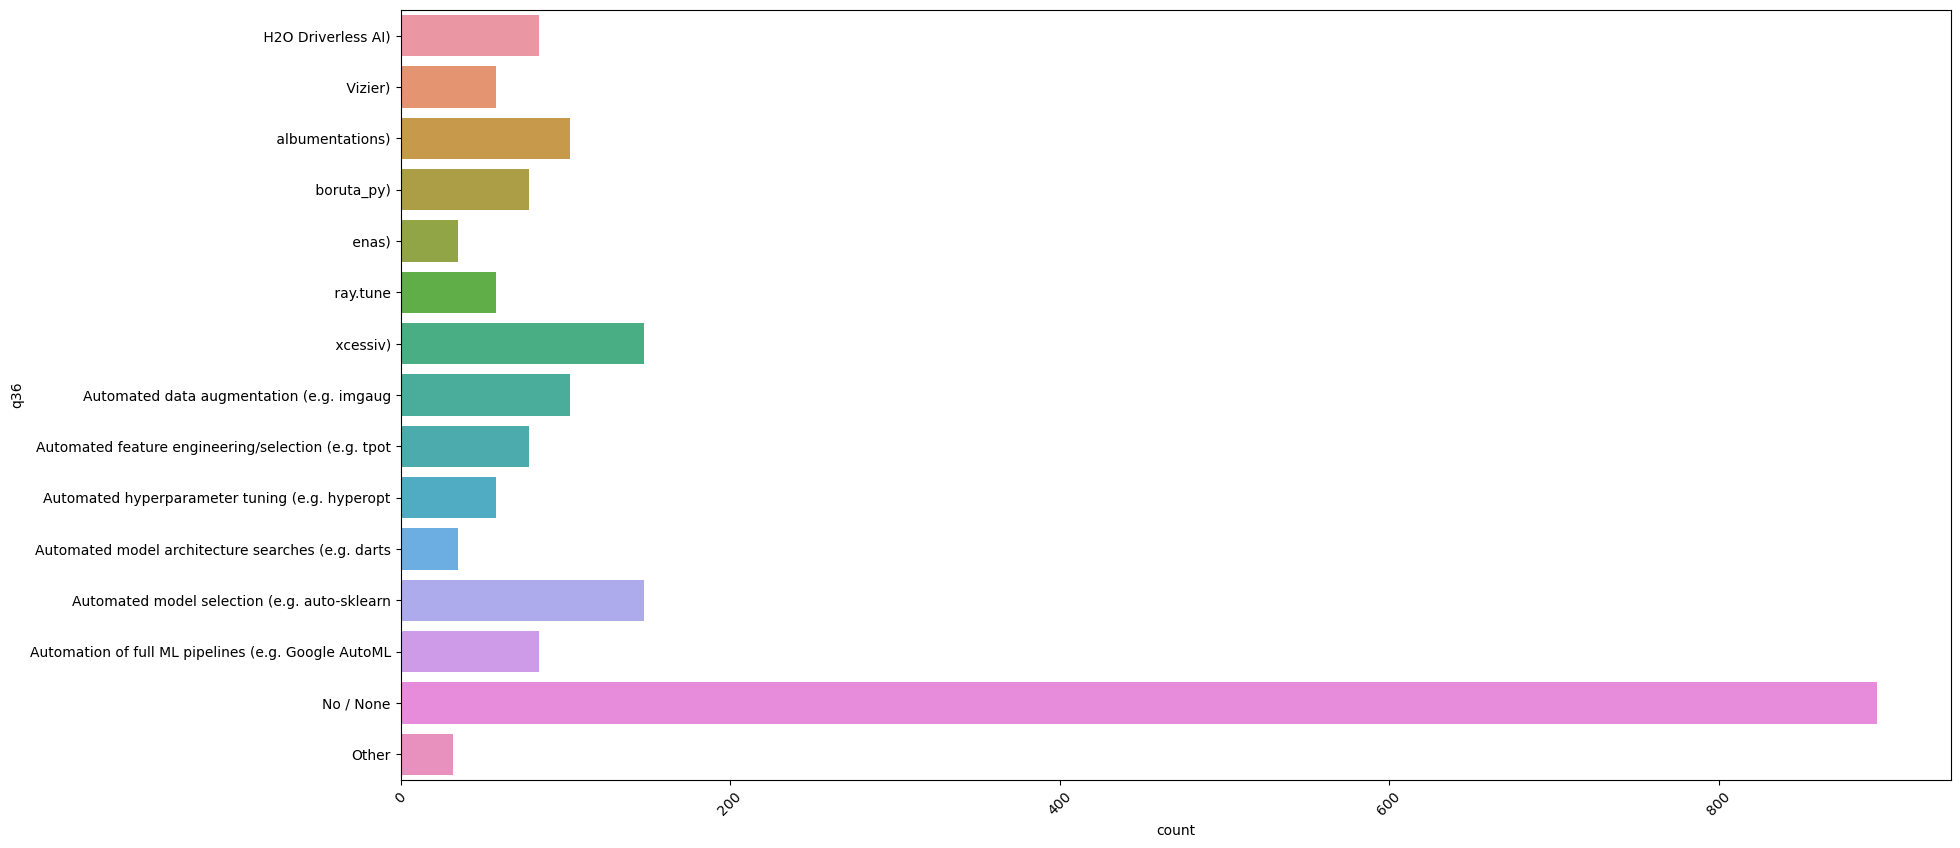

In [319]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q36', data=df_q36)
plt.xticks(rotation = 45);

# q37
- Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply).

- Question 37-A (which specific product) was only asked to respondents that answered affirmatively to  Question 36-A (which of the following categories of products)

In [320]:
df_q37=df['q37'].reset_index()
df_q37

,index,q37
0,16,NaN
1,32,NaN
2,33,NaN
3,46,NaN
4,52,NaN
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [321]:
df_q37['q37'] = df_q37['q37'].apply(quitar_comillas)

In [322]:
df_q37_explode = df_q37['q37'].explode().reset_index()

In [323]:
gb_q37 = df_q37_explode.groupby('q37').size()

In [324]:
df_q37 = gb_q37.reset_index(name='count')

In [325]:
df_q37.head()

,q37,count
0,,292
1,Amazon Sagemaker Autopilot,42
2,Azure Automated Machine Learning,53
3,DataRobot AutoML,40
4,Databricks AutoML,36


In [326]:
df_q37.drop(0, axis= 0,inplace=True)

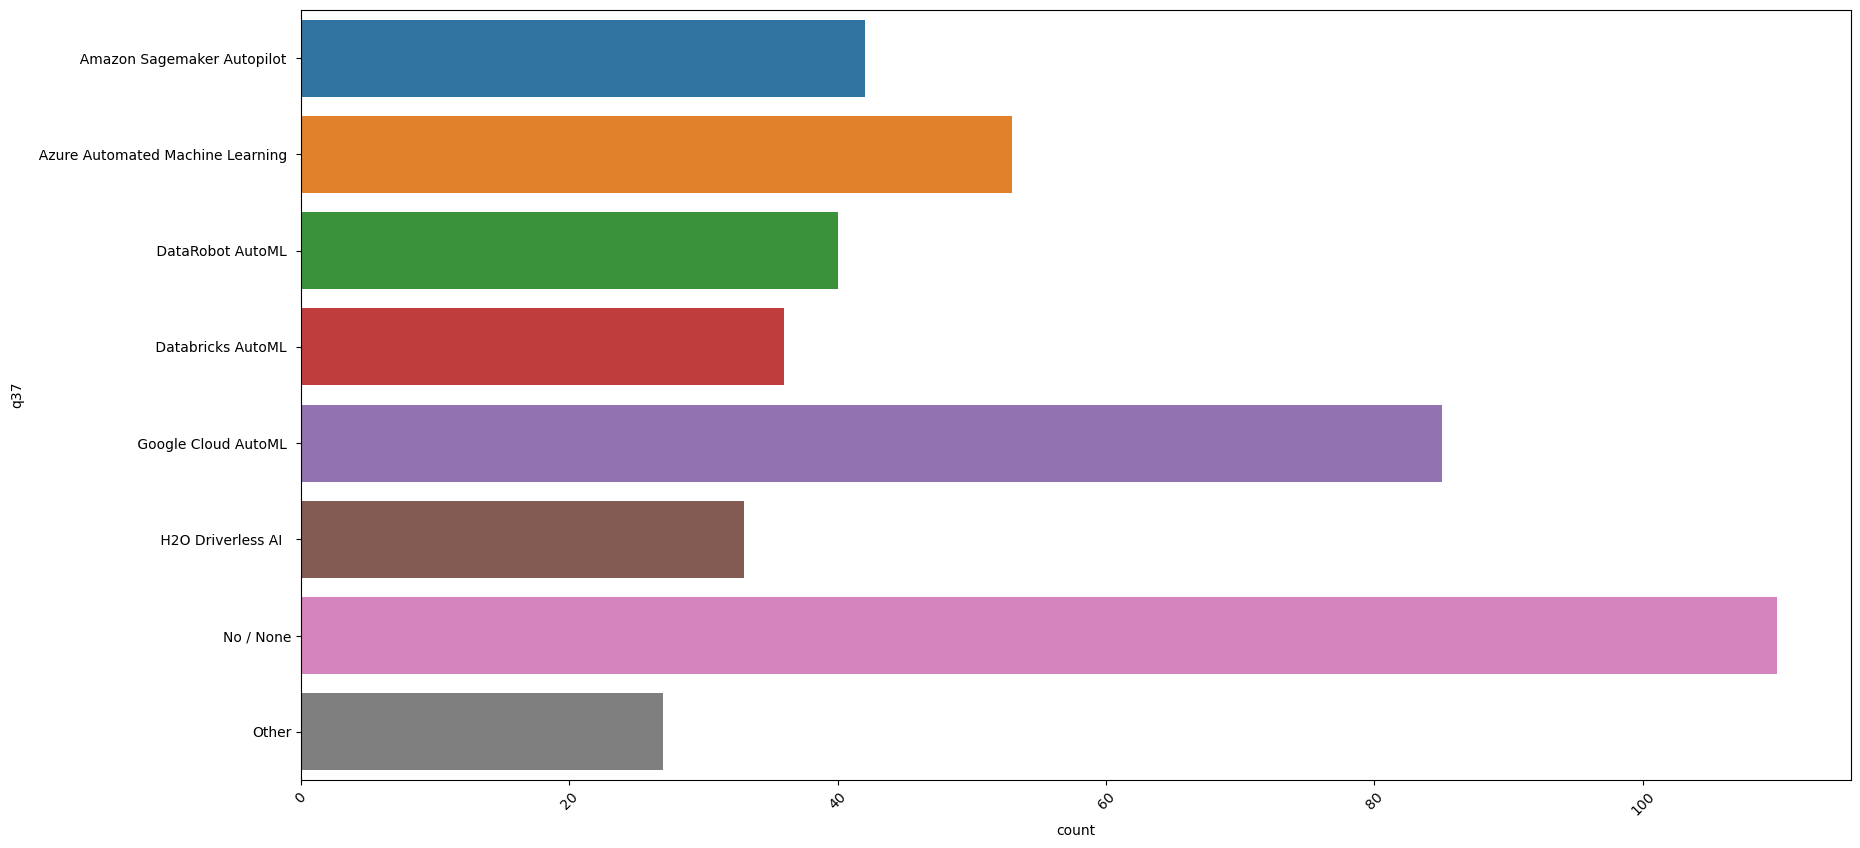

In [327]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q37', data=df_q37)
plt.xticks(rotation = 45);

# q38
- Do you use any tools to help manage machine learning experiments? (Select all that apply)

In [328]:
df_q38=df['q38'].reset_index()
df_q38

,index,q38
0,16,NaN
1,32,NaN
2,33,"No / None,"
3,46,NaN
4,52,"No / None,"
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [329]:
df_q38['q38'] = df_q38['q38'].apply(quitar_comillas)

In [330]:
df_q38_explode = df_q38['q38'].explode().reset_index()

In [331]:
gb_q38 = df_q38_explode.groupby('q38').size()

In [332]:
df_q38 = gb_q38.reset_index(name='count')

In [333]:
df_q38.head()

,q38,count
0,,1179
1,ClearML,20
2,Comet.ml,8
3,Domino Model Monitor,14
4,Guild.ai,13


In [334]:
df_q38.drop(0, axis= 0,inplace=True)

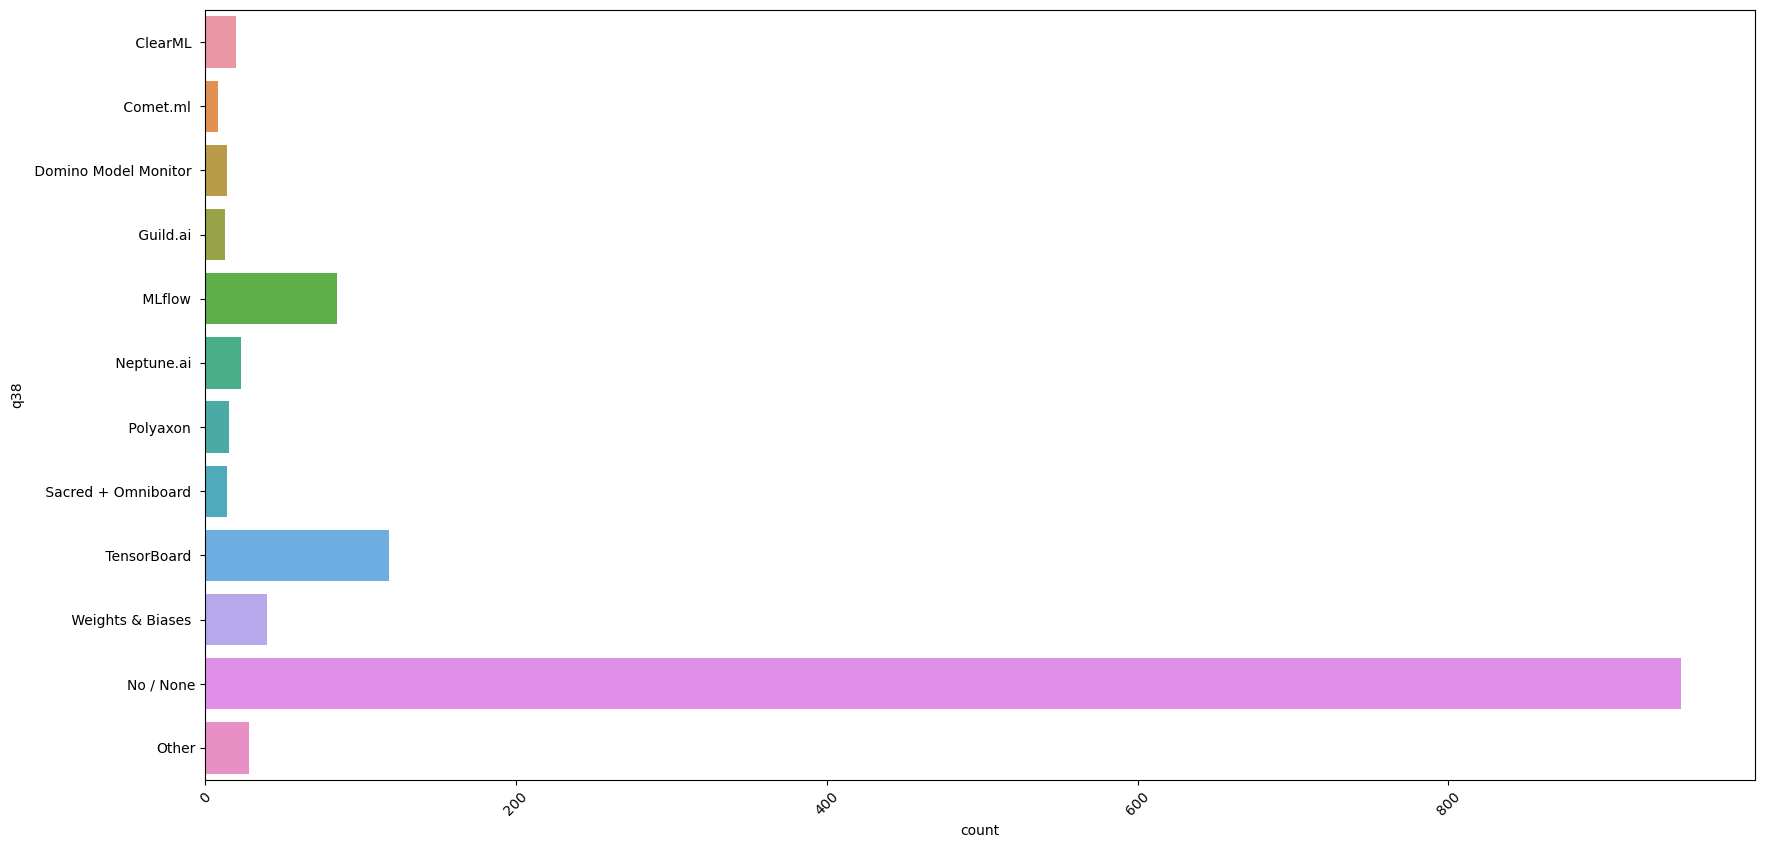

In [335]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q38', data=df_q38)
plt.xticks(rotation = 45);

# q39

In [336]:
df_q39=df['q39'].reset_index()
df_q39

,index,q39
0,16,NaN
1,32,NaN
2,33,"I do not share my work publicly,"
3,46,NaN
4,52,"I do not share my work publicly,"
...,...,...
2296,25954,NaN
2297,25959,NaN
2298,25965,NaN
2299,25966,NaN


In [337]:
df_q39['q39'] = df_q39['q39'].apply(quitar_comillas)

In [338]:
df_39_explode = df_q39['q39'].explode().reset_index()

In [339]:
df_39_explode

,index,q39
0,0,None
1,1,None
2,2,I do not share my work publicly
3,2,
4,3,None
...,...,...
4160,2298,None
4161,2299,None
4162,2300,GitHub
4163,2300,Colab


In [340]:
df_39_explode['q39'].unique()

array([None, 'I do not share my work publicly', '', ' GitHub ',
       ' Kaggle ', ' Colab ', ' Personal blog ', 'Other', ' Plotly Dash ',
       ' Streamlit ', ' Shiny ', ' NBViewer '], dtype=object)

In [341]:
gb39 = df_39_explode.groupby('q39').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [342]:
df_q39 = gb39.reset_index(name='count')

In [343]:
df_q39

,q39,count
0,,1154
1,Colab,197
2,GitHub,562
3,Kaggle,438
4,NBViewer,23
5,Personal blog,93
6,Plotly Dash,35
7,Shiny,50
8,Streamlit,49
9,I do not share my work publicly,417


In [344]:
df_q39.drop(0, axis= 0,inplace=True)

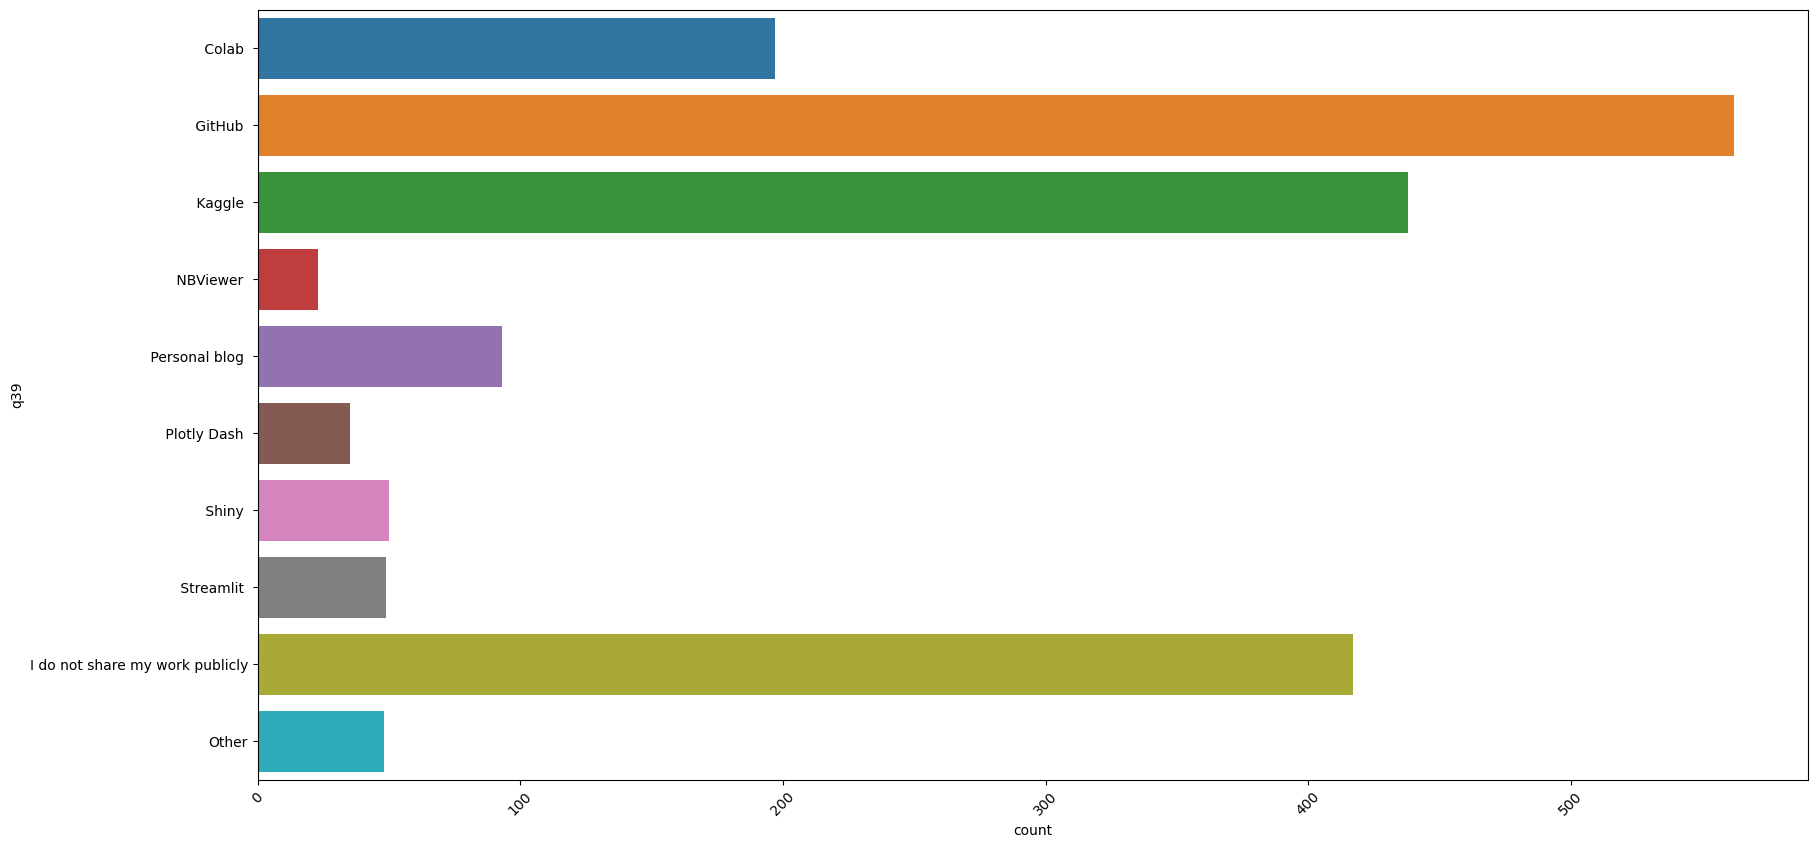

In [345]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q39', data=df_q39)
plt.xticks(rotation = 45);

# q40

In [346]:
df_q40=df['q40'].reset_index()
df_q40

,index,q40
0,16,"Coursera,Kaggle Learn Courses,Cloud-certificat..."
1,32,NaN
2,33,"Coursera,Kaggle Learn Courses,DataCamp,Univers..."
3,46,"Coursera,edX,Kaggle Learn Courses,"
4,52,"Coursera,Udemy,"
...,...,...
2296,25954,"Coursera,"
2297,25959,"Coursera,edX,Udacity,Udemy,Cloud-certification..."
2298,25965,NaN
2299,25966,NaN


In [347]:
df_q40['q40'] = df_q40['q40'].apply(quitar_comillas)

In [348]:
df_40_explode = df_q40['q40'].explode().reset_index()

In [349]:
df_40_explode

,index,q40
0,0,Coursera
1,0,Kaggle Learn Courses
2,0,Cloud-certification programs (direct from AWS
3,0,Azure
4,0,GCP
...,...,...
7373,2300,Cloud-certification programs (direct from AWS
7374,2300,Azure
7375,2300,GCP
7376,2300,or similar)


In [350]:
df_40_explode['q40'].unique()

array(['Coursera', 'Kaggle Learn Courses',
       'Cloud-certification programs (direct from AWS', ' Azure', ' GCP',
       ' or similar)', '', None, 'DataCamp',
       'University Courses (resulting in a university degree)', 'Other',
       'edX', 'Udemy', 'None', 'LinkedIn Learning', 'Fast.ai', 'Udacity'],
      dtype=object)

In [351]:
gb40 = df_40_explode.groupby('q40').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [352]:
df_q40 = gb40.reset_index(name='count')

In [353]:
df_q40

,q40,count
0,,1593
1,Azure,149
2,GCP,149
3,or similar),149
4,Cloud-certification programs (direct from AWS,149
5,Coursera,892
6,DataCamp,543
7,Fast.ai,60
8,Kaggle Learn Courses,818
9,LinkedIn Learning,367


In [354]:
df_q40.drop(0, axis= 0,inplace=True)

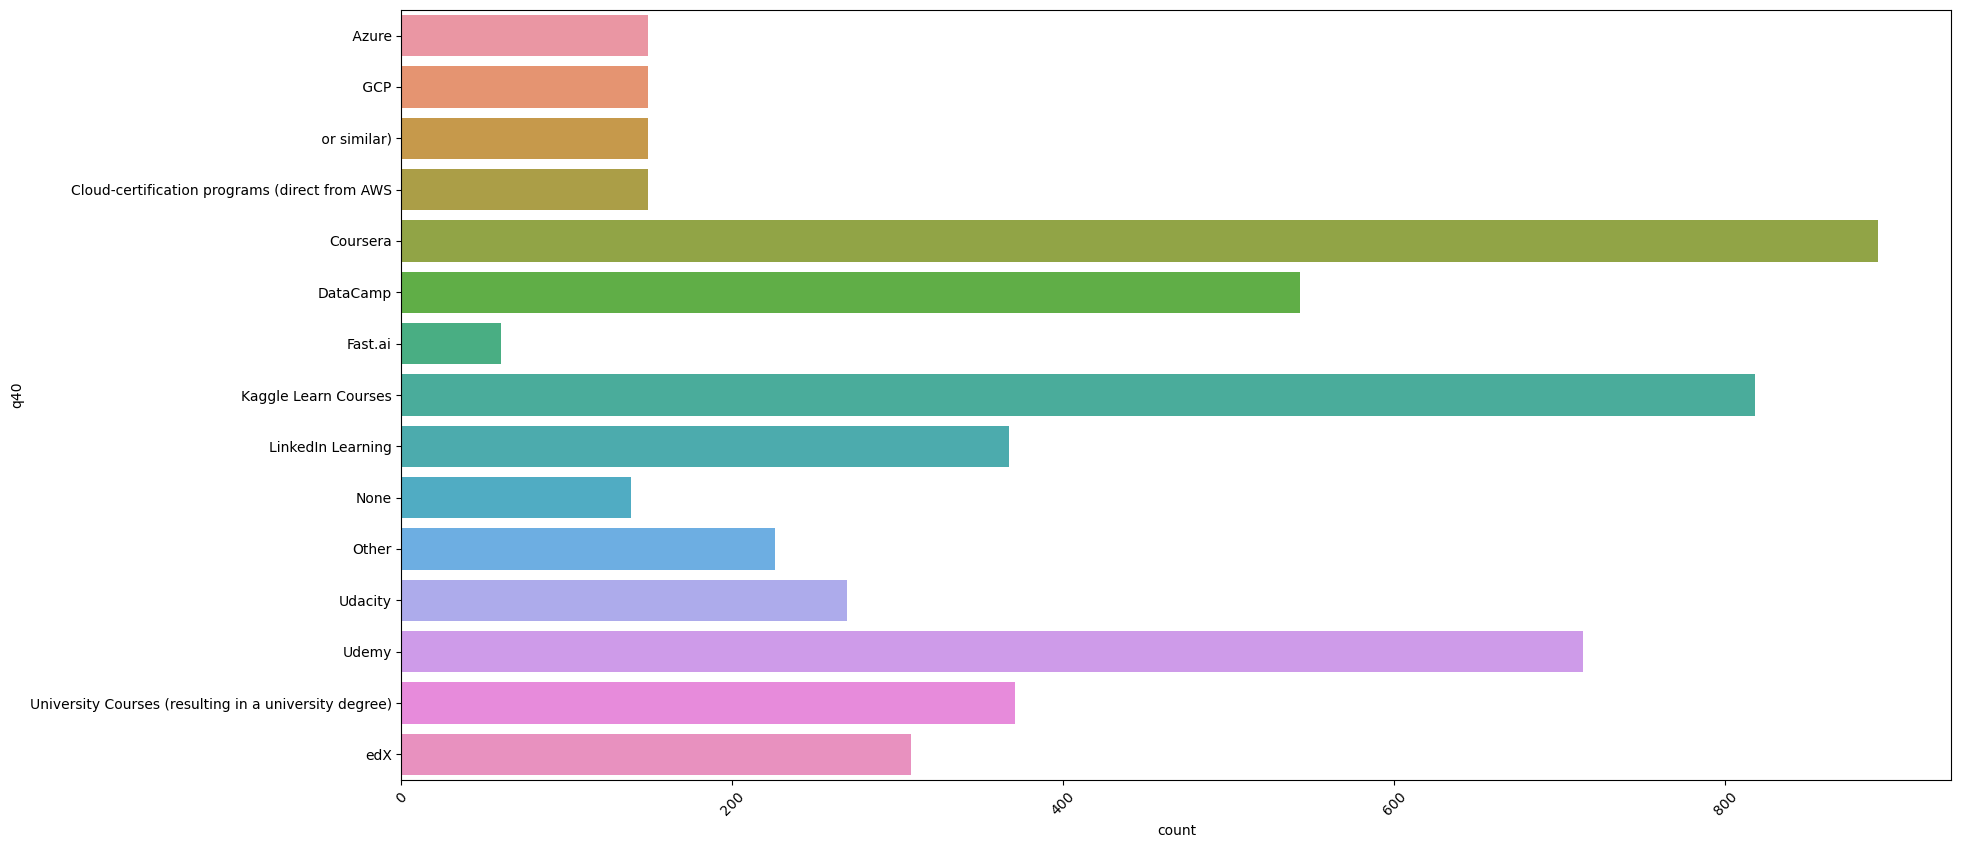

In [355]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q40', data=df_q40)
plt.xticks(rotation = 45);

# q42

In [356]:
df_q42=df['q42'].reset_index()
df_q42

,index,q42
0,16,"Kaggle (notebooks, forums, etc),Blogs (Towards..."
1,32,NaN
2,33,"Twitter (data science influencers),Email newsl..."
3,46,"Twitter (data science influencers),Kaggle (not..."
4,52,"Course Forums (forums.fast.ai, Coursera forums..."
...,...,...
2296,25954,NaN
2297,25959,"Twitter (data science influencers),Email newsl..."
2298,25965,NaN
2299,25966,NaN


In [357]:
df_q42['q42'] = df_q42['q42'].apply(quitar_comillas)

In [358]:
df_42_explode = df_q42['q42'].explode().reset_index()

In [359]:
df_42_explode

,index,q42
0,0,Kaggle (notebooks
1,0,forums
2,0,etc)
3,0,Blogs (Towards Data Science
4,0,Analytics Vidhya
...,...,...
14748,2300,etc)
14749,2300,Slack Communities (ods.ai
14750,2300,kagglenoobs
14751,2300,etc)


In [360]:
df_42_explode['q42'].unique()

array(['Kaggle (notebooks', ' forums', ' etc)',
       'Blogs (Towards Data Science', ' Analytics Vidhya', '', None,
       'Twitter (data science influencers)',
       'Email newsletters (Data Elixir', " O'Reilly Data & AI",
       'YouTube (Kaggle YouTube', ' Cloud AI Adventures',
       'Course Forums (forums.fast.ai', ' Coursera forums',
       'Slack Communities (ods.ai', ' kagglenoobs',
       'Reddit (r/machinelearning', 'None',
       'Podcasts (Chai Time Data Science', ' O’Reilly Data Show',
       'Journal Publications (peer-reviewed journals',
       ' conference proceedings', 'Other'], dtype=object)

In [361]:
gb42 = df_42_explode.groupby('q42').size() #aqui tenemos todos los espacios, que se tienen que desestimar 
#para la creacion de las graficas

In [362]:
df_q42 = gb42.reset_index(name='count')

In [363]:
df_q42

,q42,count
0,,1703
1,Analytics Vidhya,684
2,Cloud AI Adventures,969
3,Coursera forums,267
4,O'Reilly Data & AI,303
5,O’Reilly Data Show,180
6,conference proceedings,184
7,etc),4098
8,forums,1049
9,kagglenoobs,191


In [364]:
df_q42.drop(0, axis= 0,inplace=True)

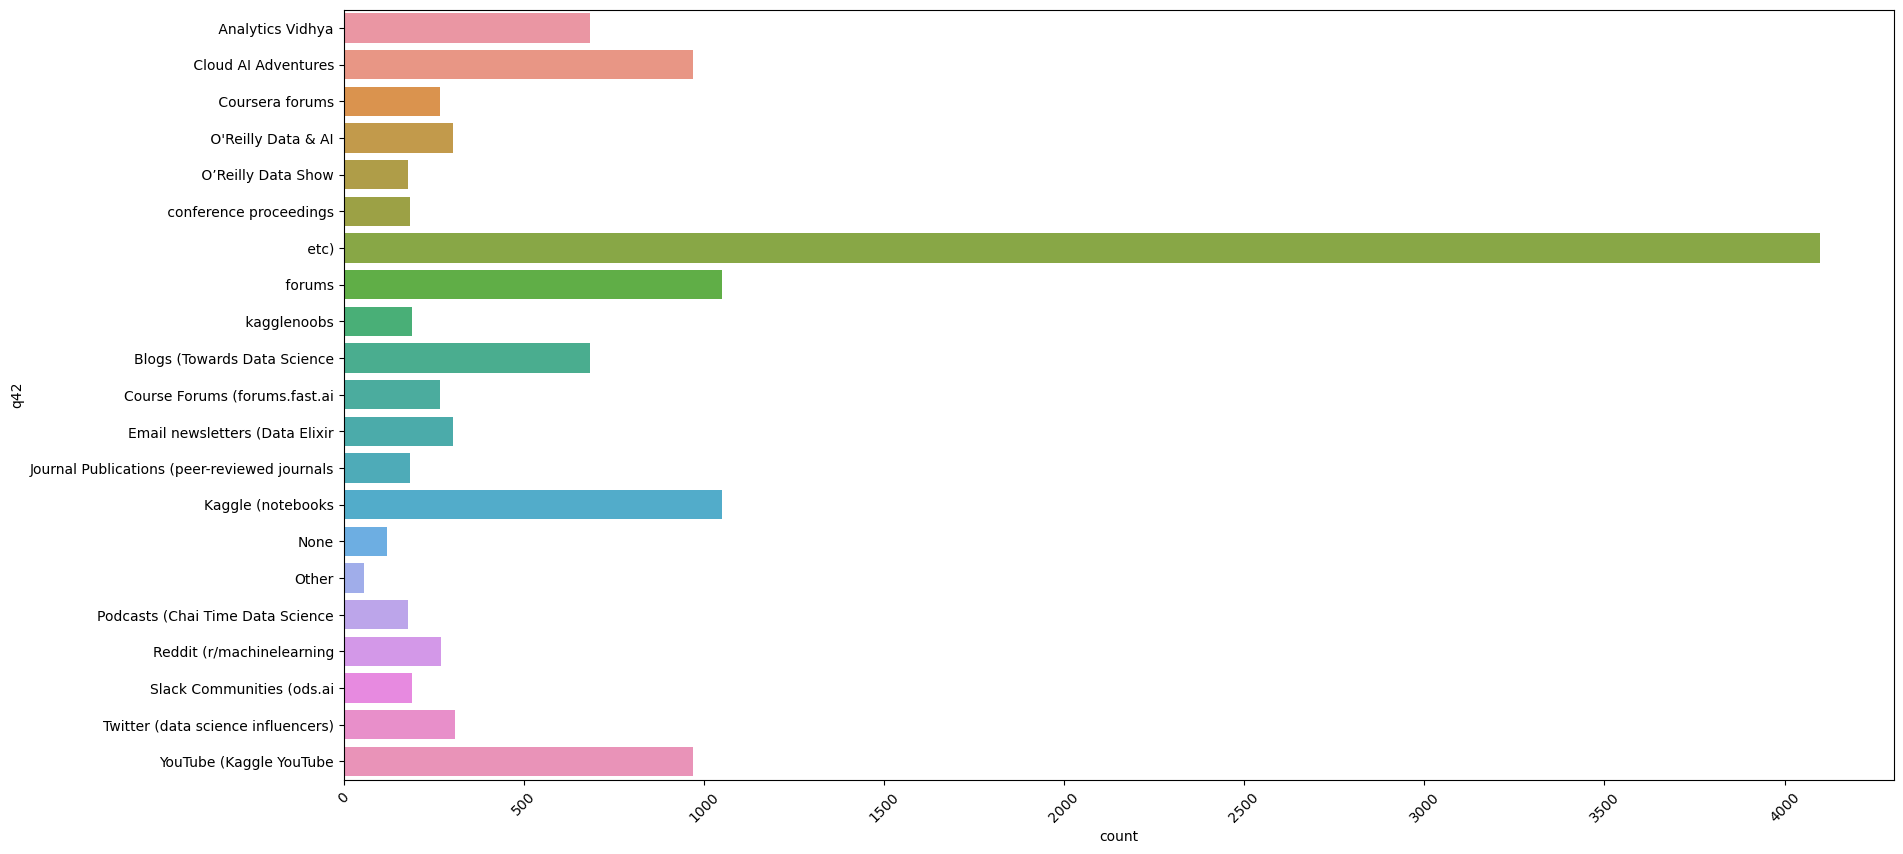

In [365]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y = 'q42', data=df_q42)
plt.xticks(rotation = 45);

 - q10:"notebook_products" 
 - q18:"vision_methods"
 - q19:"nlp"
 - q27:"cloud_platforms"
 - q29:"cloud_products"
 - q30:"data_storage_products"
 - q31:"ml_products"
 - q32:"bd_products"
 - q34:"bi_tools"
 - q36:"auto_ml"
 - q37:"aml_tools"
 - q38:"ml_experiment_tools"
 - q39:"share_app"
 - q40:"platform_courses_ds"
 - q42:"media_sources"


# Relación entre variables

In [366]:
df.head(2)

,index,q3,q5,q6,q8,q11,q13,q15,q23,q33,q41,q7,q9,q12,q14,q16,q17,q24,q28,q10,q18,q19,q27,q29,q30,q31,q36,q37,q38,q39,q40,q42
16,16,Belgium,Data Analyst,20+ years,Python,A laptop,Never,1-2 years,We are exploring ML methods (and may one day p...,NaN,"Local development environments (RStudio, Jupyt...","Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Scikit-learn,Linear or Logistic Regression,Analyze and understand data to influence produ...,NaN,"Kaggle Notebooks,Colab Notebooks, Databricks ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Coursera,Kaggle Learn Courses,Cloud-certificat...","Kaggle (notebooks, forums, etc),Blogs (Towards..."
32,32,United States of America,Data Analyst,< 1 years,R,A personal computer / desktop,Never,I do not use machine learning methods,NaN,NaN,NaN,R,RStudio,NVIDIA GPUs,Ggplot / ggplot2,NaN,NaN,NaN,NaN,"Google Cloud Datalab,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


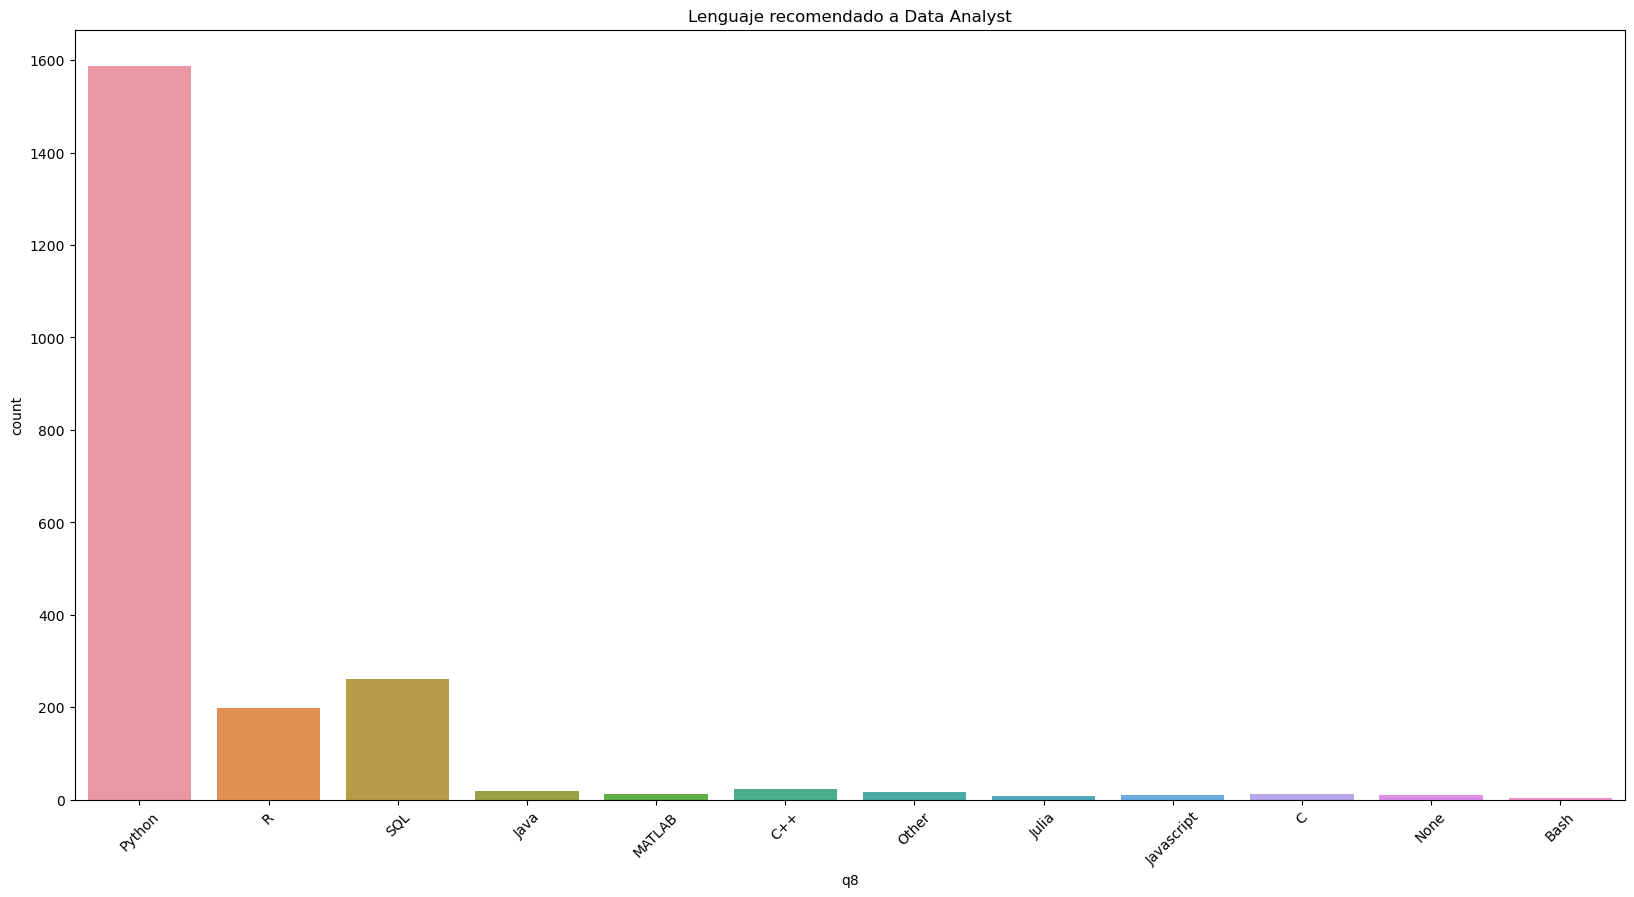

In [367]:
plt.figure(figsize=(20,10))
sns.countplot(x ='q8', data=df)
plt.title('Lenguaje recomendado a Data Analyst')
plt.xticks(rotation = 45);

In [370]:
df_q7=df['q7'].reset_index()
df_q7

,index,q7
0,16,"Python, SQL"
1,32,R
2,33,Python
3,46,"Python, SQL, C, C++, Java, Javascript, MATLAB"
4,52,"R, SQL"
...,...,...
2296,25954,Python
2297,25959,"Python, SQL"
2298,25965,"Python, SQL, C"
2299,25966,"Python, C"


In [371]:
df_q7['q7'] = df_q7['q7'].apply(quitar_comillas)

In [372]:
df_7_explode = df_q7['q7'].explode().reset_index()

In [374]:
gb7 = df_7_explode.groupby('q7').size()

In [375]:
df_q7 = gb7.reset_index(name='count')

In [376]:
df_q7.drop(0, axis= 0,inplace=True)

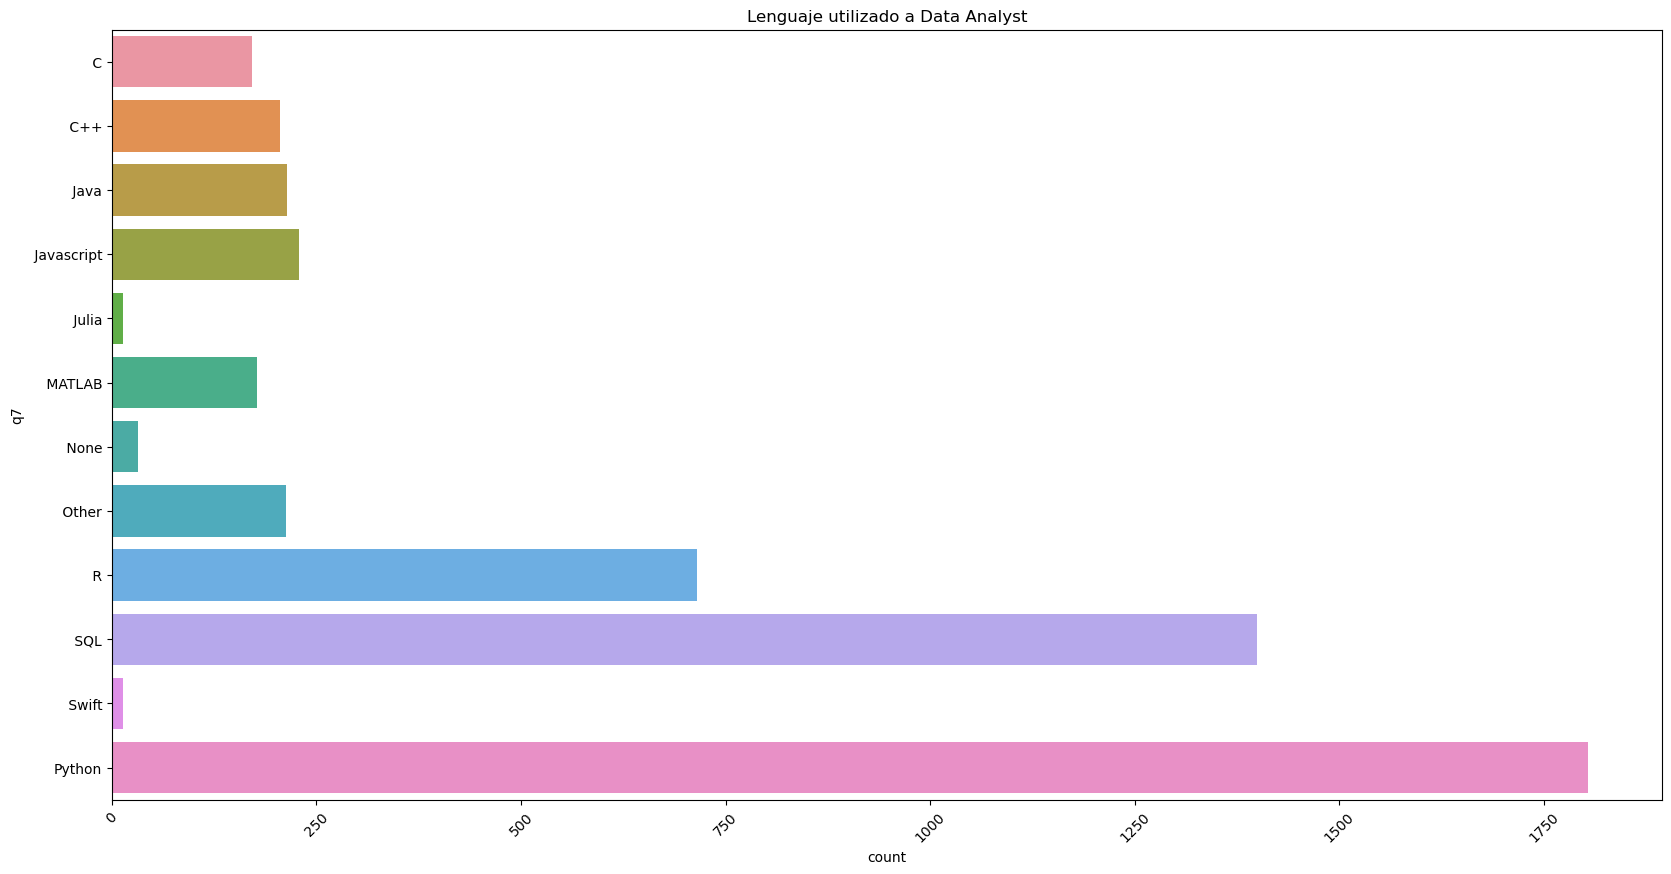

In [379]:
plt.figure(figsize=(20,10))
sns.barplot(x ='count', y='q7', data=df_q7)
plt.title('Lenguaje utilizado a Data Analyst')
plt.xticks(rotation = 45);